In [1]:
# MNIST로 인식

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [4]:
# 층이 5개인 딥 러닝 모델

# 데이터 텐서모양 변경 : 2차원
# 표준화(0 ~ 1) - 학습
# 정답은 one hot encoding
# 딥러닝 모델구조를 Sequential
# hidden layer : Dense 를 3
# 컴파일
# 학습 : hist변수로 받아서 차후에 시각화
# 정확률 측정
# hist를 이용해서  시각화를 통해 최적의 epoch를 유추

In [5]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
# 최초
n_input = 28*28
n_hidden1 = 28*28*2
n_hidden2 = n_hidden1 / 2
n_hidden3 = n_hidden2 / 2
n_output = 10

In [7]:
# 신경망 구조 설계
model = Sequential()
#입력층과 연결되는 Dense
dense1= Dense(units=n_hidden1,input_shape=(n_input,)
              , kernel_initializer='random_uniform',activation='tanh')
dense2= Dense(units=n_hidden2,activation='tanh')
dense3= Dense(units=n_hidden3,activation='tanh')
# 출력층 Dense
dense4= Dense(units=n_output,activation='tanh')
model.add(dense1)
model.add(dense2)
model.add(dense3)
model.add(dense4)

In [8]:
# 신경망 학습
model.compile(loss='mean_squared_error'
              ,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [9]:
hist = model.fit(x_train, y_train, batch_size=128
          , epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 13s 26ms/step - loss: 0.2439 - accuracy: 0.1037 - val_loss: 0.1901 - val_accuracy: 0.1010
Epoch 2/30
469/469 [==============================] - 12s 26ms/step - loss: 0.1882 - accuracy: 0.1021 - val_loss: 0.1874 - val_accuracy: 0.1010
Epoch 3/30
469/469 [==============================] - 12s 26ms/step - loss: 0.1859 - accuracy: 0.1022 - val_loss: 0.1863 - val_accuracy: 0.1010
Epoch 4/30
469/469 [==============================] - 12s 26ms/step - loss: 0.1847 - accuracy: 0.1022 - val_loss: 0.1854 - val_accuracy: 0.1010
Epoch 5/30
469/469 [==============================] - 12s 26ms/step - loss: 0.1839 - accuracy: 0.1022 - val_loss: 0.1856 - val_accuracy: 0.1010
Epoch 6/30
469/469 [==============================] - 12s 26ms/step - loss: 0.1832 - accuracy: 0.1022 - val_loss: 0.1846 - val_accuracy: 0.1010
Epoch 7/30
469/469 [==============================] - 12s 26ms/step - loss: 0.1829 - accuracy: 0.1022 - val_loss: 0.1842 - val_accuracy:

In [10]:
res = model.evaluate(x_test,y_test)
res

313/313 [==============================] - 2s 6ms/step - loss: 0.0937 - accuracy: 0.0958


[0.09370855242013931, 0.0957999974489212]

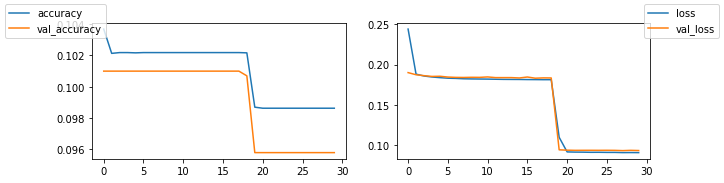

In [12]:
import matplotlib.pyplot as plt
fig, ax =  plt.subplots(1,2,figsize=(10,2.5))
sns.lineplot(data=hist.history['accuracy'],ax=ax[0])
sns.lineplot(data=hist.history['val_accuracy'],ax=ax[0])
fig.legend(['accuracy','val_accuracy'],loc = 'upper left')

sns.lineplot(data=hist.history['loss'],ax=ax[1])
sns.lineplot(data=hist.history['val_loss'],ax=ax[1])
fig.legend(['loss','val_loss'])

plt.show()

In [13]:
# 가중치 초기화
# kernel_initializer의 기본값은 glorot_uniform
# Glorot2010에서 유래... 성능이 좋다고판다해서 기본 값으로 채택  
# 균일분포보다 우수한 성능을 제공

In [15]:
# 앞으로는 glorot_uniform를 사용 코드가 깔끔해짐
# dense1= Dense(units=n_hidden1,input_shape=(n_input,) ,activation='tanh')
# dense2= Dense(units=n_hidden2,activation='tanh')
# dense3= Dense(units=n_hidden3,activation='tanh')
# # 출력층 Dense
# dense4= Dense(units=n_output,activation='tanh')

In [16]:
# Dense 층이 많아지면 문제 발생
# 그레이디언트 소멸문제
# 과잉적합

In [17]:
# 미분의 연쇄법칙 chain rule에 의해서 i번째 층의 그레이던트는 오른쪽의 i+1번째 층의 그레이던트에 자신층에서 발생한 
# 그레이디언트를 곱해서 구함
# 그레이디언트가 0.001처럼 작은 경우 왼쪽으로 진행하면서 점점 작아짐
# 왼쪽으로 갈수록 가중치 갱신이 느려져서 전체 신경망의 학습이 매우 느린현상

In [ ]:
# 코렙에서는 하드웨어 가속기를 TPU로 설정

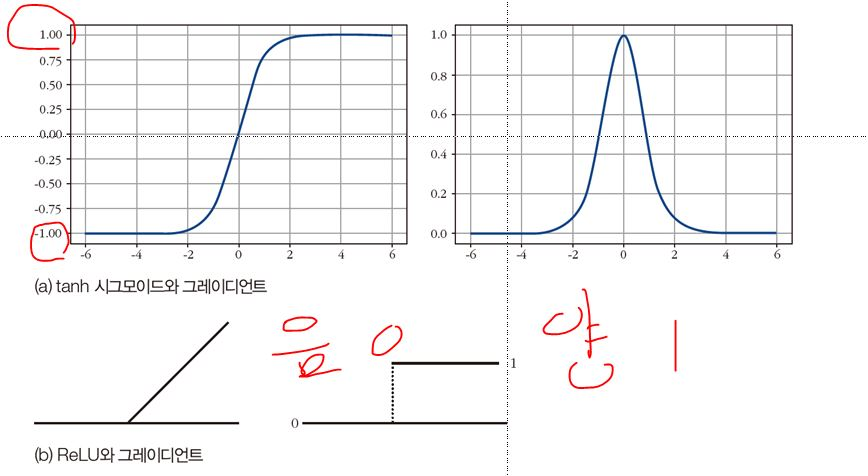

In [18]:
# 그레이디언트 소멸문제
# ReLU 함수를 이용해서 해결
# Tanh(s) 시그모이드 함수의 문제점
# s가 클때 그레이던트가 0에 가까워짐
# ReLU는 s가 음수일때 그레이던트는 0 양수일때는 1
from IPython import display
display.Image('E:/1 강남야간/img/021.jpg',width=500, height=500)

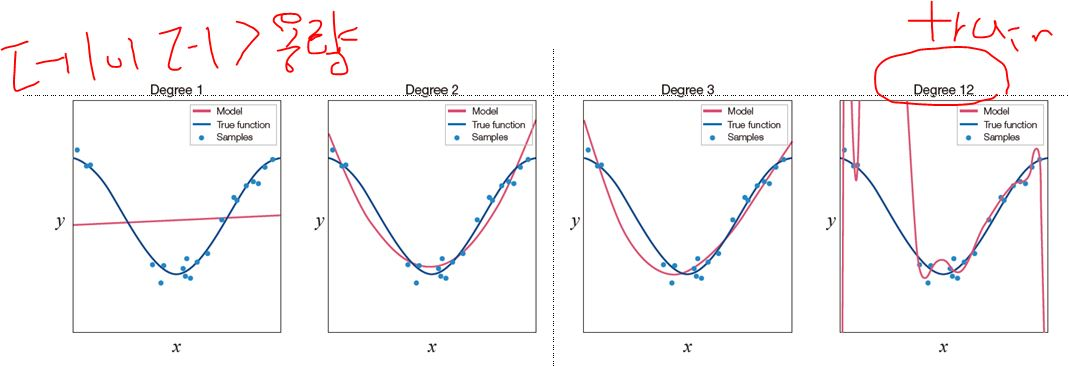

In [19]:
display.Image('E:/1 강남야간/img/022.jpg',width=500, height=500)

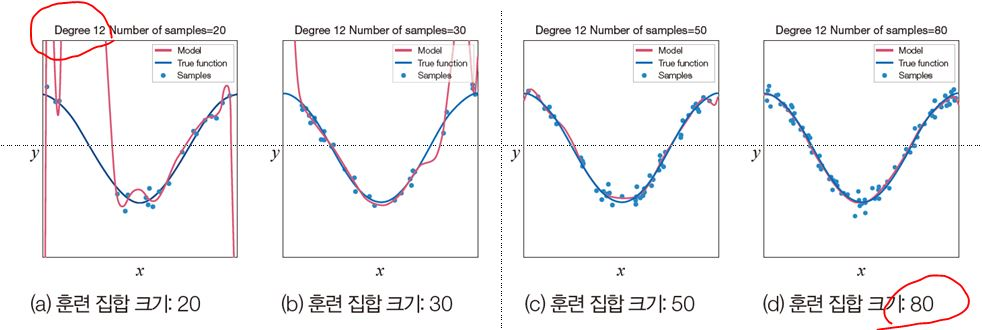

In [20]:
# 딥러닝의 회피전략
# 데이터의 양을 늘리, 데이터의 양을 늘릴수 없는 상황 -> 훈련셈플을 변형해서 인위적으로 늘리는 데이터 증대
# data augmentation
display.Image('E:/1 강남야간/img/023.jpg',width=500, height=500)

In [ ]:
# 규제기법, - 데이터증대, 가중치 감쇠, 드랍아웃, 앙상블등

In [21]:
# 손실함수
# 평균제곱오차 MSE
# 평균제곱오차의 문제점
# 교정에 사용하는 값- 그레이디언트가 벌점에 해당, 오차 e가 더큰데 그레이디언트가 더 작은 상황이 발생
# (비유 공부를 못하는 학생이 더 높은점수를 받는 상황)
# 학습이 느려지거나 학습이 안되는 상황이 발생

In [22]:
# 엔트로피 entropy
# 확율 분포의 무작위성을 측정하는 함수

In [ ]:
# 텐서 플로는 30여종의 손실 함수 제공
# http://keras.io./losses

In [24]:
# 손실함수를 지정하는 코딩 방식
# model.compile(loss='categorical_crossentropy'...)

# import tensorflow as tf
# model.compile(loss=tf.keras.losses.categorical_crossentropy...

# import tensorflow.keras.losses as ls
# model.compile(loss=ls.categorical_crossentropy...

In [26]:
# 손실함수의 성능 비교 실험
import numpy as np
import tensorflow as  tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [27]:
# mnist를 읽어와서 신경망에 입력할수 있는 형태로 변환
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
# 학습용데이터
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

#검증용
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [28]:
# L=5
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

In [32]:
# 평균제곱오차를 사용한 모델
model_mse = Sequential()
d1 = Dense(units=n_hidden1,input_shape=(n_input,),activation='tanh')
d2 = Dense(units=n_hidden2,activation='tanh')
d3 = Dense(units=n_hidden3,activation='tanh')
d4 = Dense(units=n_hidden4,activation='tanh')
d5 = Dense(units=n_output,activation='tanh')
model_mse.add(d1)
model_mse.add(d2)
model_mse.add(d3)
model_mse.add(d4)
model_mse.add(d5)
model_mse.compile(loss=tf.keras.losses.mean_squared_error
                  ,optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist_mse = model_mse.fit(x_train,y_train,batch_size=128,epochs=30
                         ,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 9s - loss: 0.0365 - accuracy: 0.8722 - val_loss: 0.0224 - val_accuracy: 0.9293 - 9s/epoch - 19ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0191 - accuracy: 0.9398 - val_loss: 0.0159 - val_accuracy: 0.9519 - 8s/epoch - 18ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0145 - accuracy: 0.9542 - val_loss: 0.0131 - val_accuracy: 0.9582 - 8s/epoch - 18ms/step
Epoch 4/30
469/469 - 8s - loss: 0.0121 - accuracy: 0.9619 - val_loss: 0.0113 - val_accuracy: 0.9637 - 8s/epoch - 18ms/step
Epoch 5/30
469/469 - 9s - loss: 0.0107 - accuracy: 0.9664 - val_loss: 0.0102 - val_accuracy: 0.9669 - 9s/epoch - 20ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0095 - accuracy: 0.9706 - val_loss: 0.0096 - val_accuracy: 0.9681 - 8s/epoch - 18ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0087 - accuracy: 0.9733 - val_loss: 0.0088 - val_accuracy: 0.9694 - 8s/epoch - 18ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0080 - accuracy: 0.9761 - val_loss: 0.0081 - val_accuracy: 0.9707 - 8s/epoch - 18ms/step
Epoch 9/30
469/4

In [ ]:
# 교차 엔트로피를 사용한 모델
model_ce = Sequential()
d1 = Dense(units=n_hidden1,input_shape=(n_input,),activation='tanh')
d2 = Dense(units=n_hidden2,activation='tanh')
d3 = Dense(units=n_hidden3,activation='tanh')
d4 = Dense(units=n_hidden4,activation='tanh')
d5 = Dense(units=n_output,activation='tanh')
model_ce.add(d1)
model_ce.add(d2)
model_ce.add(d3)
model_ce.add(d4)
model_ce.add(d5)
model_ce.compile(loss=tf.keras.losses.categorical_crossentropy
                  ,optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist_ce = model_ce.fit(x_train,y_train,batch_size=128,epochs=30
                         ,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 9s - loss: 8.4730 - accuracy: 0.3004 - val_loss: 8.5184 - val_accuracy: 0.3128 - 9s/epoch - 19ms/step
Epoch 2/30
469/469 - 8s - loss: 8.5289 - accuracy: 0.3051 - val_loss: 8.7715 - val_accuracy: 0.3145 - 8s/epoch - 18ms/step
Epoch 3/30
469/469 - 8s - loss: 8.8069 - accuracy: 0.3063 - val_loss: 8.9407 - val_accuracy: 0.3134 - 8s/epoch - 18ms/step
Epoch 4/30
469/469 - 8s - loss: 8.8703 - accuracy: 0.3057 - val_loss: 8.9407 - val_accuracy: 0.3134 - 8s/epoch - 18ms/step
Epoch 5/30
469/469 - 8s - loss: 8.8703 - accuracy: 0.3057 - val_loss: 8.9407 - val_accuracy: 0.3134 - 8s/epoch - 18ms/step
Epoch 6/30
469/469 - 9s - loss: 8.8703 - accuracy: 0.3057 - val_loss: 8.9407 - val_accuracy: 0.3134 - 9s/epoch - 19ms/step
Epoch 7/30
469/469 - 9s - loss: 8.8703 - accuracy: 0.3057 - val_loss: 8.9407 - val_accuracy: 0.3134 - 9s/epoch - 20ms/step
Epoch 8/30
469/469 - 9s - loss: 8.8703 - accuracy: 0.3057 - val_loss: 8.9407 - val_accuracy: 0.3134 - 9s/epoch - 20ms/step
Epoch 9/30
469/4

In [ ]:
# 두 모델의 정확율 비교
res_mse = model_mse.evaluate(x_test,y_test)
res_ce = model_ce.evaluate(x_test,y_test)
res_mse, res_ce